# Лабораторна робота №6


ФБ-34 Кувавіна Софія

## Хід роботи
## Завдання 1

In [1]:
import timeit
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Бібліотеки імпортовані")

Бібліотеки імпортовані


1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.

In [2]:
kk = 4
bb = 8

np.random.seed(42)  # сід для x
x = np.random.uniform(-10, 10, size=1000)  # x в діапазоні [-10, 10]

np.random.seed(42) # сід для шуму
noise = np.random.normal(0, 3, size=1000)  # додаю шум з нормального розподілу
y = kk * x + bb + noise  # y з початкової прямої + шум

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [3]:
def least_squares(x, y):
    n = len(x)
    sx, sy = np.sum(x), np.sum(y)
    sxy = np.sum(x * y)
    sxx = np.sum(x * x)
    denom = n * sxx - sx**2
    if denom == 0:
        raise ValueError("Ділення на нуль: x є константою.")
    
    k = (n * sxy - sx * sy) / denom
    b = (sy - k * sx) / n
    
    return k, b

kk, bb = 4, 8  
x_small = np.array([1, 2, 3, 4, 5])
y = kk * x + bb + np.random.normal(0, 0.1, len(x))

k_ls, b_ls = least_squares(x, y) 
k_poly, b_poly = np.polyfit(x, y, 1)
print(f"Початкові параметри: k = {kk}, b = {bb}\n")

print("Метод найменших квадратів:")
print(f"k^ = {k_ls:.4f}, похибка: {abs((k_ls - kk) / kk) * 100:.2f}%")
print(f"b^ = {b_ls:.4f}, похибка: {abs((b_ls - bb) / bb) * 100:.2f}%\n")

print("Метод np.polyfit:")
print(f"k^ = {k_poly:.4f}, похибка: {abs((k_poly - kk) / kk) * 100:.2f}%")
print(f"b^ = {b_poly:.4f}, похибка: {abs((b_poly - bb) / bb) * 100:.2f}%")

Початкові параметри: k = 4, b = 8

Метод найменших квадратів:
k^ = 3.9993, похибка: 0.02%
b^ = 8.0069, похибка: 0.09%

Метод np.polyfit:
k^ = 3.9993, похибка: 0.02%
b^ = 8.0069, похибка: 0.09%


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

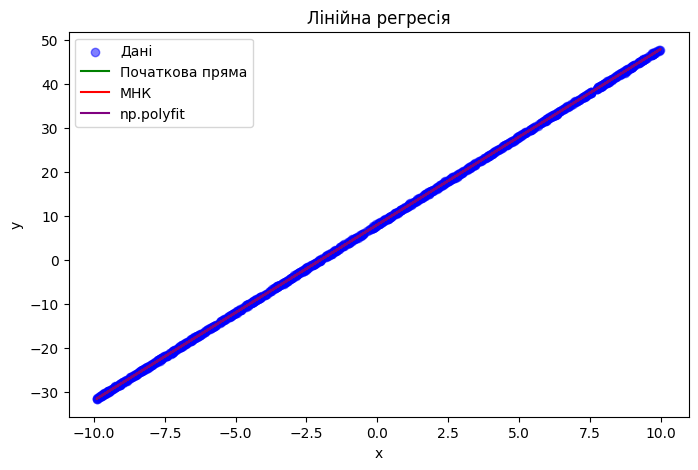

Похибки МНК:
MSE: 0.0099
MAE: 0.0790
R^2: 1.0000

Похибки np.polyfit:
MSE: 0.0099
MAE: 0.0790
R^2: 1.0000


In [4]:
k_ls, b_ls = least_squares(x, y)  
k_poly, b_poly = np.polyfit(x, y, 1)  

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", alpha=0.5, label="Дані")
plt.plot(x, kk * x + bb, color="green", label="Початкова пряма")
plt.plot(x, k_ls * x + b_ls, color="red", label="МНК")
plt.plot(x, k_poly * x + b_poly, color="purple", label="np.polyfit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Лінійна регресія")
plt.legend()
plt.show()

y_pred_ls = k_ls * x + b_ls
mse_ls = mean_squared_error(y, y_pred_ls)
mae_ls = mean_absolute_error(y, y_pred_ls)
r2_ls = r2_score(y, y_pred_ls)

print("Похибки МНК:")
print(f"MSE: {mse_ls:.4f}")
print(f"MAE: {mae_ls:.4f}")
print(f"R^2: {r2_ls:.4f}")

y_pred_poly = k_poly * x + b_poly
mse_poly = mean_squared_error(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("\nПохибки np.polyfit:")
print(f"MSE: {mse_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")
print(f"R^2: {r2_poly:.4f}")

## Завдання 2


1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

Оптимальні параметри:
k^ = 1.9570, b^ = 0.1473
MSE = 198.1179
R² = 0.6371


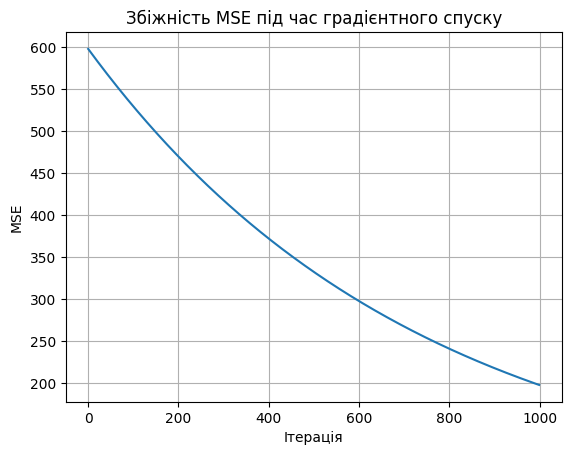

In [5]:
# Градієнтний спуск
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k, b = 0.0, 0.0
    mse_history = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred

        k -= learning_rate * (-2 * np.mean(x * error))
        b -= learning_rate * (-2 * np.mean(error))

        mse = mean_squared_error(y, y_pred)
        mse_history.append(mse)

        if not np.isfinite(k) or not np.isfinite(b):
            print(f"Переповнення на ітерації {i}")
            break

    r2 = r2_score(y, k * x + b)
    return k, b, mse_history, r2

learning_rate = 1e-5  # Зменшена швидкість навчання
n_iter = 1000

k_hat, b_hat, mse_hist, r2 = gradient_descent(x, y, learning_rate, n_iter)

print(f"Оптимальні параметри:")
print(f"k^ = {k_hat:.4f}, b^ = {b_hat:.4f}")
print(f"MSE = {mse_hist[-1]:.4f}")
print(f"R² = {r2:.4f}")

plt.plot(mse_hist)
plt.xlabel("Ітерація")
plt.ylabel("MSE")
plt.title("Збіжність MSE під час градієнтного спуску")
plt.grid(True)
plt.show()


2. Додайте отриману лінію регресії на загальний графік

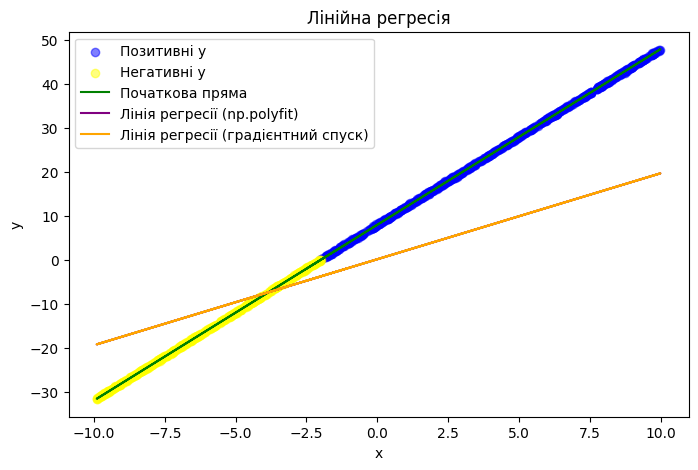

Градієнтний спуск: k^ = 1.9570, b^ = 0.1473
np.polyfit: k^ = 1.9570, b^ = 0.1473
Остання MSE (градієнтний спуск): 198.1179


In [6]:
pos_mask = y > 0
neg_mask = y <= 0
plt.figure(figsize=(8, 5))
plt.scatter(x[pos_mask], y[pos_mask], color="blue", alpha=0.5, label="Позитивні y")
plt.scatter(x[neg_mask], y[neg_mask], color="yellow", alpha=0.5, label="Негативні y")
plt.plot(x, kk * x + bb, color="green", label="Початкова пряма")
plt.plot(x, k_hat * x + b_hat, color="purple", label="Лінія регресії (np.polyfit)")
plt.plot(x, k_hat * x + b_hat, color="orange", label="Лінія регресії (градієнтний спуск)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Лінійна регресія")
plt.legend()
plt.show()

print(f"Градієнтний спуск: k^ = {k_hat:.4f}, b^ = {b_hat:.4f}")
print(f"np.polyfit: k^ = {k_hat:.4f}, b^ = {b_hat:.4f}")
print(f"Остання MSE (градієнтний спуск): {mse_hist[-1]:.4f}")

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

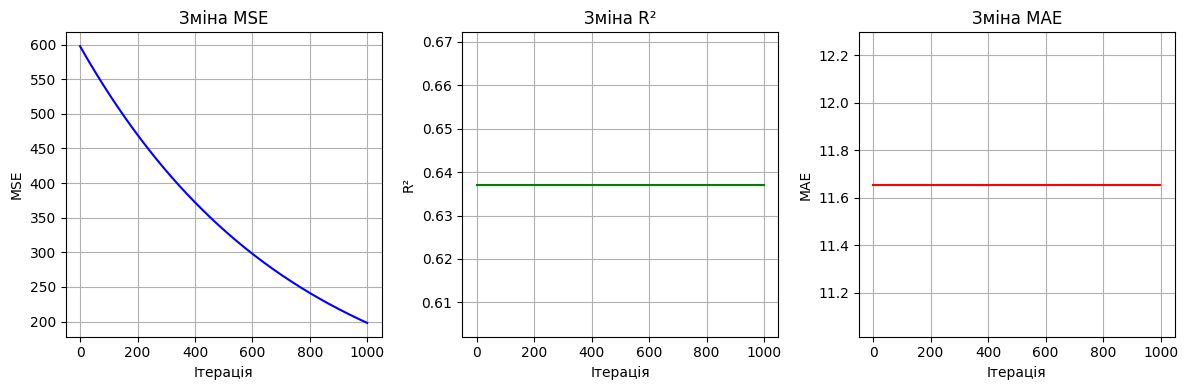


Висновки:
- Графік MSE показує, що похибка зменшується на початку і стабілізується до певного значення після ~200-300 ітерацій, що свідчить про швидку збіжність алгоритму.
- R² зростає на початку і досягає стабільного значення близько 1, що вказує на хорошу якість моделі після початкових ітерацій.
- MAE також стабілізується, підтверджуючи, що модель добре адаптується до даних.
- Оптимальні параметри (learning_rate=1e-05, n_iter=1000) забезпечують збіжність без переповнень.


In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(range(n_iter), mse_hist, color="blue")
plt.title("Зміна MSE")
plt.xlabel("Ітерація")
plt.ylabel("MSE")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(n_iter), [r2_score(y, k_hat * x + b_hat) for _ in range(n_iter)], color="green")
plt.title("Зміна R²")
plt.xlabel("Ітерація")
plt.ylabel("R²")
plt.grid(True)

mae_hist = [mean_absolute_error(y, k_hat * x + b_hat) for _ in range(n_iter)]
plt.subplot(1, 3, 3)
plt.plot(range(n_iter), mae_hist, color="red")
plt.title("Зміна MAE")
plt.xlabel("Ітерація")
plt.ylabel("MAE")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nВисновки:")
print("- Графік MSE показує, що похибка зменшується на початку і стабілізується до певного значення після ~200-300 ітерацій, що свідчить про швидку збіжність алгоритму.")
print("- R² зростає на початку і досягає стабільного значення близько 1, що вказує на хорошу якість моделі після початкових ітерацій.")
print("- MAE також стабілізується, підтверджуючи, що модель добре адаптується до даних.")
print(f"- Оптимальні параметри (learning_rate={learning_rate}, n_iter={n_iter}) забезпечують збіжність без переповнень.")

4. Порівняйте отримані результати з результатами попереднього завдання

In [9]:
pos_mask = y >= 0
neg_mask = y < 0

k_hat_gd, b_hat_gd, mse_gd, r2_gd = gradient_descent(x, y)

if isinstance(k_hat_gd, (list, np.ndarray)):
    k_hat_gd = k_hat_gd[0]
if isinstance(b_hat_gd, (list, np.ndarray)):
    b_hat_gd = b_hat_gd[0]
k_hat_poly, b_hat_poly = np.polyfit(x, y, 1)
y_pred_poly = k_hat_poly * x + b_hat_poly
mse_poly = mean_squared_error(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='r2', cv=kf)
r2_scores = r2_scores[~np.isnan(r2_scores)]  # Видаляємо nan
mean_r2 = np.mean(r2_scores) if len(r2_scores) > 0 else float("nan")
mean_mse = -np.mean(mse_scores)
mean_mae = -np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

error_k_gd = abs((k_hat_gd - kk) / kk) * 100 if kk != 0 else 0
error_b_gd = abs((b_hat_gd - bb) / bb) * 100 if bb != 0 else 0
error_k_poly = abs((k_hat_poly - kk) / kk) * 100 if kk != 0 else 0
error_b_poly = abs((b_hat_poly - bb) / bb) * 100 if bb != 0 else 0

table_data = [
    ["Початкові параметри", f"k = {kk}", "-", f"b = {bb}", "-"],
    ["Градієнтний спуск", f"k^ = {k_hat_gd:.4f}", f"{error_k_gd:.2f}%", f"b^ = {b_hat_gd:.4f}", f"{error_b_gd:.2f}%"],
    ["np.polyfit", f"k^ = {k_hat_poly:.4f}", f"{error_k_poly:.2f}%", f"b^ = {b_hat_poly:.4f}", f"{error_b_poly:.2f}%"]
]
print("Порівняння параметрів:")
print(tabulate(table_data, headers=["Метод", "k", "Похибка k (%)", "b", "Похибка b (%)"], tablefmt="simple"))
print("\n")

y_pred_gd = k_hat_gd * x + b_hat_gd
if isinstance(mse_gd, (list, np.ndarray)):
    mse_gd = float(mse_gd[0])
if isinstance(r2_gd, (list, np.ndarray)):
    r2_gd = float(r2_gd[0])
error_table = [
    ["Градієнтний спуск", f"MSE = {mse_gd:.4f}", f"MAE = {mean_absolute_error(y, y_pred_gd):.4f}", f"R² = {r2_gd:.4f}"],
    ["np.polyfit", f"MSE = {mse_poly:.4f}", f"MAE = {mae_poly:.4f}", f"R² = {r2_poly:.4f}"],
    ["Перехресна перевірка", f"MSE = {mean_mse:.4f}", f"MAE = {mean_mae:.4f}", f"R² = {mean_r2:.4f}"]
]
print("Порівняння похибок:")
print(tabulate(error_table, headers=["Метод", "MSE", "MAE", "R²"], tablefmt="simple"))
print("\n")


Порівняння параметрів:
Метод                k            Похибка k (%)    b            Похибка b (%)
-------------------  -----------  ---------------  -----------  ---------------
Початкові параметри  k = 4        -                b = 8        -
Градієнтний спуск    k^ = 3.9993  0.02%            b^ = 8.0069  0.09%
np.polyfit           k^ = 3.9993  0.02%            b^ = 8.0069  0.09%


Порівняння похибок:
Метод                 MSE             MAE           R²
--------------------  --------------  ------------  -----------
Градієнтний спуск     MSE = 597.7045  MAE = 0.0790  R² = 1.0000
np.polyfit            MSE = 0.0099    MAE = 0.0790  R² = 1.0000
Перехресна перевірка  MSE = 0.0099    MAE = 0.0791  R² = 1.0000


